# 4.1 Machine Learning section.

>In this section will be plotting learning curves.

> http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import string
import re
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import nltk
import nlp_ml_functions
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import label_binarize, MultiLabelBinarizer, binarize, FunctionTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
sns.set_style('white')

## Using `relevance` as labels.

### Loading dataset into a pandas dataframe.

In [3]:
balanced_df = pd.read_pickle("balanced_df")

In [4]:
X_article = balanced_df['article_text']
y_article = balanced_df['relevance']

## 1 - Creating bag of words.

In [5]:
bow = CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)

In [6]:
bow.fit(X_article)

CountVectorizer(analyzer=<function process_dataframe_text at 0x1147c3ae8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [7]:
bow_transformed = bow.transform(X_article)

## 2 - Plots for different models.

>Note. Using `pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', MultinomialNB())])` takes a long time.

### Naive-Bayes Multinomial.

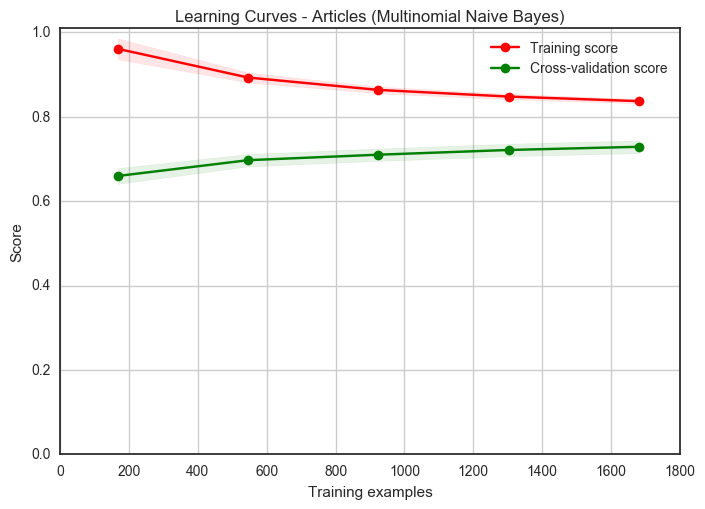

In [8]:
title = "Learning Curves - Articles (Multinomial Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

#estimator = pipeline
estimator = MultinomialNB()
nlp_ml_functions.plot_learning_curve(estimator, title, bow_transformed, y_article, ylim=(0.0, 1.01), cv=cv);

>`Both the training score and the cross-validation score are not very good at the end. The shape of the curve can be found in complex datasets often: the training score is very high at the beginning and decreases and the cross validation score is very low at the beginning and increases.`

Source: sklearn documentation (http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

### Naive-Bayes Bernoulli.

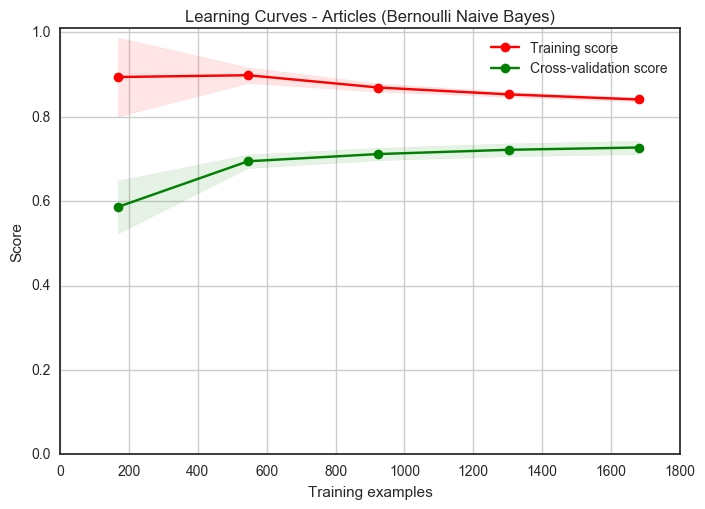

In [9]:
title = "Learning Curves - Articles (Bernoulli Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

#estimator = pipeline
estimator = BernoulliNB()
nlp_ml_functions.plot_learning_curve(estimator, title, bow_transformed, y_article, ylim=(0.0, 1.01), cv=cv);

### Logistic Regression.

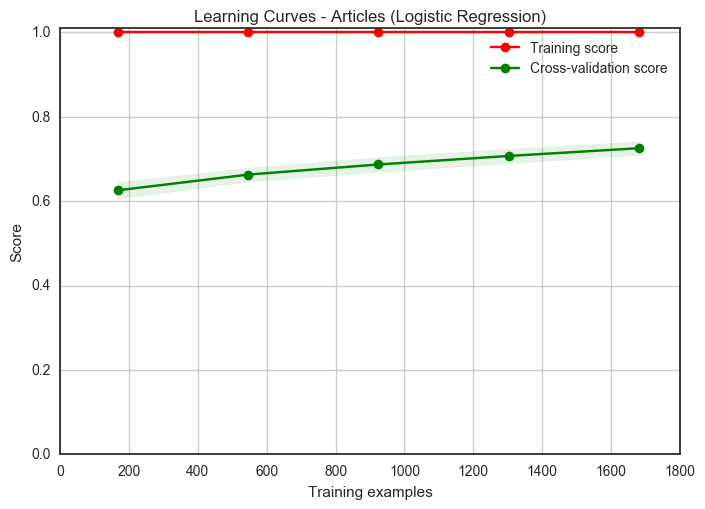

In [10]:
title = "Learning Curves - Articles (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

#estimator = pipeline
estimator = LogisticRegression()
nlp_ml_functions.plot_learning_curve(estimator, title, bow_transformed, y_article, ylim=(0.0, 1.01), cv=cv);

>`The training score is still around the maximum and the validation score could be increased with more training samples`.

### k-nearest neighbors classifier.

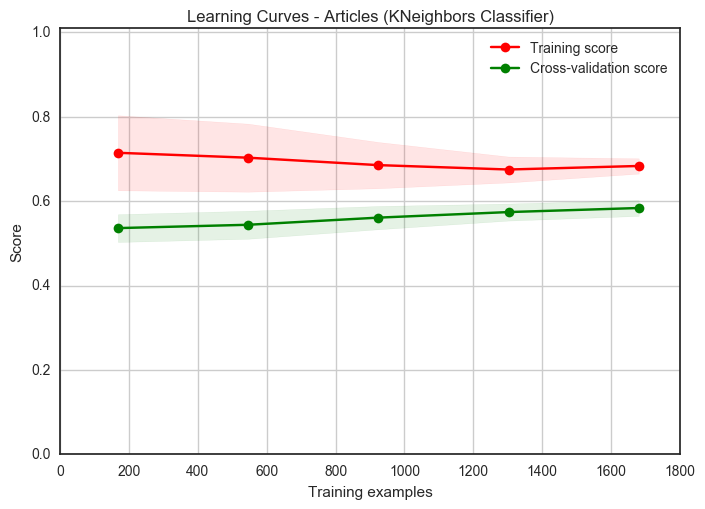

In [11]:
title = "Learning Curves - Articles (KNeighbors Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

#estimator = pipeline
estimator = KNeighborsClassifier()
nlp_ml_functions.plot_learning_curve(estimator, title, bow_transformed, y_article, ylim=(0.0, 1.01), cv=cv);

### RandomForestClassifier.

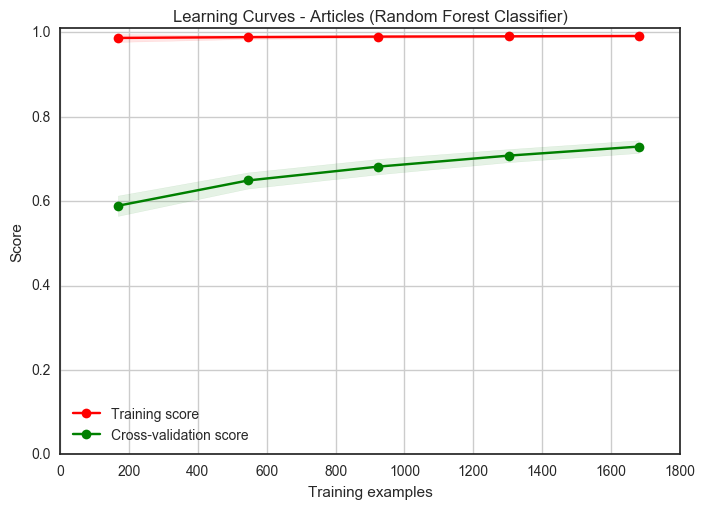

In [12]:
title = "Learning Curves - Articles (Random Forest Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

#estimator = pipeline
estimator = RandomForestClassifier()
nlp_ml_functions.plot_learning_curve(estimator, title, bow_transformed, y_article, ylim=(0.0, 1.01), cv=cv);

### AdaBoostClassifier.

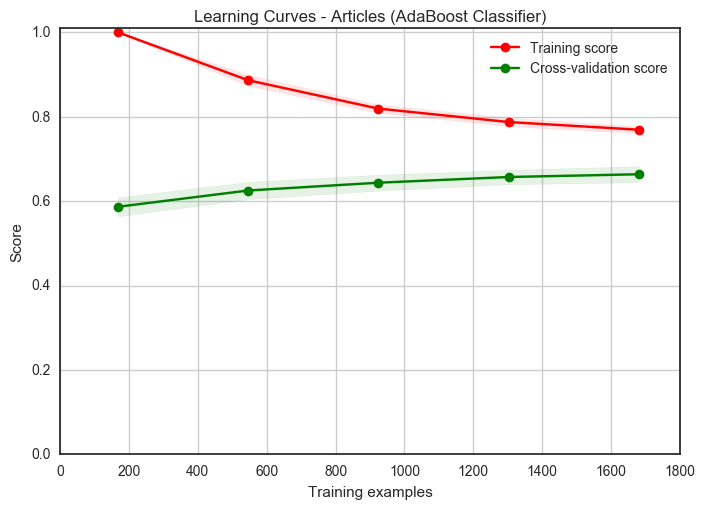

In [13]:
title = "Learning Curves - Articles (AdaBoost Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

#estimator = pipeline
estimator = AdaBoostClassifier()
nlp_ml_functions.plot_learning_curve(estimator, title, bow_transformed, y_article, ylim=(0.0, 1.01), cv=cv);

### SVM.

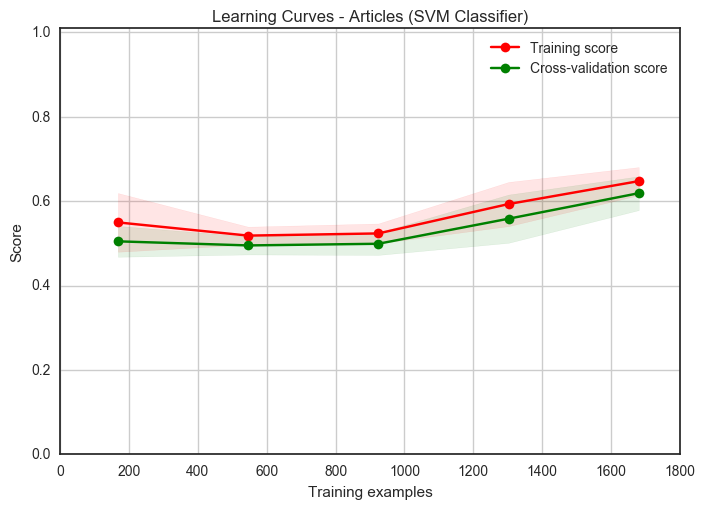

In [14]:
title = "Learning Curves - Articles (SVM Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

#estimator = pipeline
estimator = SVC()
nlp_ml_functions.plot_learning_curve(estimator, title, bow_transformed, y_article, ylim=(0.0, 1.01), cv=cv);

### GradientBoostingClassifier.

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

http://stackoverflow.com/questions/28384680/scikit-learns-pipeline-a-sparse-matrix-was-passed-but-dense-data-is-required

In [15]:
pipeline = Pipeline([('to_dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),('classifier', GradientBoostingClassifier())])

In [ ]:
title = "Learning Curves - Articles (GradientBoosting Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

estimator = pipeline
#estimator = GradientBoostingClassifier()
nlp_ml_functions.plot_learning_curve(estimator, title, bow_transformed, y_article, ylim=(0.0, 1.01), cv=cv);

>Could not run above as it was taking more than 60 m.